# Example data analysis notebook

This notebook downloads and analyses some surface air temperature anomaly data from [Berkeley Earth](http://berkeleyearth.org/).

Import the required libraries.

In [16]:
import matplotlib.pyplot as plt
# import  seaborn as sns # if we want to clean up the plots
import pandas as pd
import requests

Use the [requests](http://docs.python-requests.org/) library to download the data file for Australia.

In [2]:
# Define the URL
url = 'http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/australia-TAVG-Trend.txt'
# Download the content of the URL
response = requests.get(url)
# Save it to a file
with open("data.txt", 'w') as open_file:
    open_file.write(response.text)

## Open & Clean  the Data

To begin there are some data cleaning steps that you need to implement here. 
Often when you are building a workflow you build it out in it's entirety first 
to get the pieces working. And then you turn those pieces into functions to 
modularize and scale your workflow

In [3]:
temp_df = pd.read_csv(url,
                      skiprows=69,
                      delim_whitespace=True)

all_cols = temp_df.columns[1:]

# Remove the last row
temp_df = temp_df.iloc[:, :-1]

# CLEANUP: Drop the commas from the column names & Add a day column
temp_df.columns = [acol.replace(',', '') for acol in all_cols]
temp_df = temp_df.assign(Day=1)

# Finally create a date time column
temp_df["date"] = pd.to_datetime(temp_df[['Year', 'Month', 'Day']])
temp_df.set_index("date", inplace=True)
temp_df

,Year,Month,Anomaly,Unc.,Anomaly.1,Unc..1,Anomaly.2,Unc..2,Anomaly.3,Unc..3,Anomaly.4,Unc.,Day
date,,,,,,,,,,,,,
1876-02-01,1876,2,-0.371,1.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1876-03-01,1876,3,0.124,1.455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1876-04-01,1876,4,-0.697,1.023,-0.557,0.487,NaN,NaN,NaN,NaN,NaN,NaN,1
1876-05-01,1876,5,-0.142,1.078,-0.509,0.470,NaN,NaN,NaN,NaN,NaN,NaN,1
1876-06-01,1876,6,-0.941,0.932,-0.379,0.464,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,2020,2,1.022,0.146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2020-03-01,2020,3,0.434,0.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2020-04-01,2020,4,1.526,0.168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# Initial  Visualization

Plot the data to explore it!

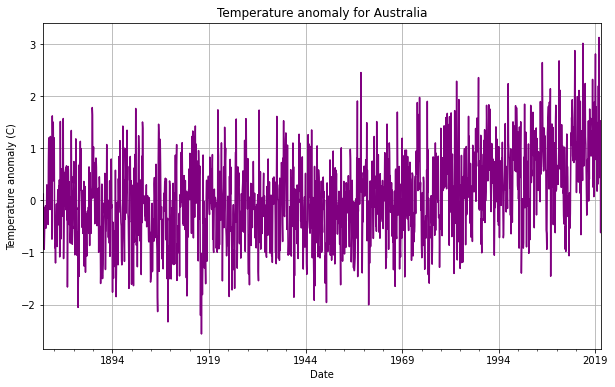

In [14]:
f, ax = plt.subplots(figsize=(10, 6))

temp_df.plot(y="Anomaly",
             ax=ax,
             legend=False,
            color="Purple")

ax.set(title="Temperature anomaly for Australia",
       xlabel='Date',
       ylabel='Temperature anomaly (C)')
plt.grid()
plt.show()

The data are kind of noisy at this scale so let's calculate a 12-month moving average for a smoother time series.

In [8]:
temp_moving_avg = temp_df["Anomaly"].rolling(window=12).mean()
temp_moving_avg

date
1876-02-01         NaN
1876-03-01         NaN
1876-04-01         NaN
1876-05-01         NaN
1876-06-01         NaN
                ...   
2020-02-01    1.322000
2020-03-01    1.208583
2020-04-01    1.236833
2020-05-01    1.113667
2020-06-01    1.141083
Name: Anomaly, Length: 1733, dtype: float64

## Plot the Data

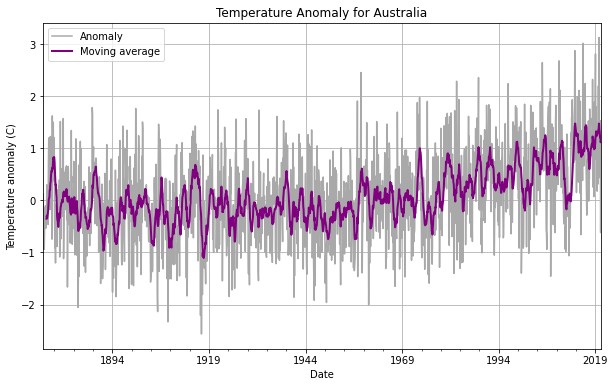

In [13]:
f, ax = plt.subplots(figsize=(10, 6))


temp_df.plot(y="Anomaly",
             ax=ax,
             legend=True,
             color="DarkGrey",
             label="Anomaly")

temp_moving_avg.plot(ax=ax,
                     legend=True,
                     color="Purple",
                     linewidth=2,
                     label="Moving average")

ax.set(title="Temperature Anomaly for Australia",
       xlabel='Date',
       ylabel='Temperature anomaly (C)')
plt.grid()
plt.show()

## Modularize Your Workflow

The function below may be bigger than you want. It is a 
starting  place. 

In [31]:

def open_and_clean(url):
    """
    A function that is designed to clean up  data downloaded  from 
    the Berkely earth website. Assuming here that your data  from 
    this site are always in the same format.
    
    Parameters
    ----------
    url : string
        Path to the data  from the Berkeley earth  website
        
    Returns
    -------
    Pandas.DataFrame
    
    """
    
    temp_df = pd.read_csv(url,
                          skiprows=69,
                          delim_whitespace=True)

    all_cols = temp_df.columns[1:]

    # Remove the last row
    temp_df = temp_df.iloc[:, :-1]

    # CLEANUP: Drop the commas from the column names & Add a day column
    temp_df.columns = [acol.replace(',', '') for acol in all_cols]
    temp_df = temp_df.assign(Day=1)

    # Finally create a date time column
    temp_df["date"] = pd.to_datetime(temp_df[['Year', 'Month', 'Day']])
    
    return temp_df.set_index("date")

In [32]:
help(open_and_clean)

Help on function open_and_clean in module __main__:

open_and_clean(url)
    A function that is designed to clean up  data downloaded  from 
    the Berkely earth website. Assuming here that your data  from 
    this site are always in the same format.
    
    Parameters
    ----------
    url : string
        Path to the data  from the Berkeley earth  website
        
    Returns
    -------
    Pandas.DataFrame



In [34]:
url = 'http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/australia-TAVG-Trend.txt'

temp_australia = open_and_clean(url)
temp_australia.head()

,Year,Month,Anomaly,Unc.,Anomaly.1,Unc..1,Anomaly.2,Unc..2,Anomaly.3,Unc..3,Anomaly.4,Unc.,Day
date,,,,,,,,,,,,,
1876-02-01,1876,2,-0.371,1.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1876-03-01,1876,3,0.124,1.455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1876-04-01,1876,4,-0.697,1.023,-0.557,0.487,NaN,NaN,NaN,NaN,NaN,NaN,1
1876-05-01,1876,5,-0.142,1.078,-0.509,0.470,NaN,NaN,NaN,NaN,NaN,NaN,1
1876-06-01,1876,6,-0.941,0.932,-0.379,0.464,NaN,NaN,NaN,NaN,NaN,NaN,1


<AxesSubplot:xlabel='date'>

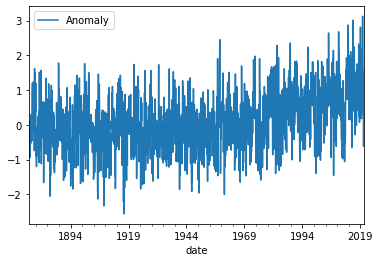

In [37]:
temp_australia.plot(y="Anomaly")
plt.show()

## Try this on another location

http://berkeleyearth.lbl.gov/country-list/

http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/belize-TAVG-Trend.txt

<AxesSubplot:xlabel='date'>

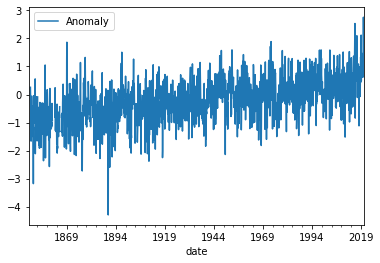

In [40]:
url_belize = "http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/belize-TAVG-Trend.txt"
temp_belize = open_and_clean(url_belize)

temp_belize.plot(y="Anomaly")